In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [3]:
#read the cleaned dataset
data = pd.read_excel('/content/drive/MyDrive/consumer/Dataset_2/dataset_clean.xlsx')
data.head()

,Unnamed: 0,Comments,Class,cleaned_text
0,0,আমি দারাজ থেকে এই পণ্য কিনে সন্তুষ্ট 👌👍😍,Positive,দারাজ পণ্য কিনে সন্তুষ্ট
1,1,কর্মক্ষমতা ভাল না,Negative,কর্মক্ষমতা ভাল না
2,2,আমি দারাজ এর কাছে কৃতজ্ঞ।,Positive,দারাজ কৃতজ্ঞ
3,3,এটা অবশ্যই খুব ভাল পণ্য,Positive,অবশ্যই ভাল পণ্য
4,4,সম্পূর্ণ সন্তুষ্ট .... সত্যিই চিত্তাকর্ষক,Positive,সম্পূর্ণ সন্তুষ্ট সত্যিই চিত্তাকর্ষক


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2208 non-null   int64 
 1   Comments      2208 non-null   object
 2   Class         2208 non-null   object
 3   cleaned_text  2207 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.1+ KB


In [5]:
data.drop(columns={'Unnamed: 0'},axis=1,inplace=True)
data.dropna(inplace=True)

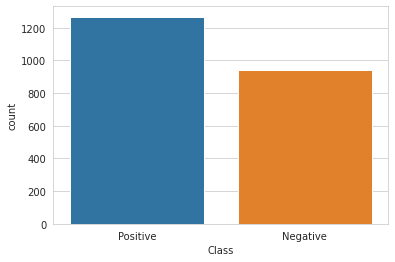

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Class', data = data)

In [7]:
# Remove the Text with least words

data['length'] = data['cleaned_text'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 2207


In [8]:
#calculate the summary of  dataset
def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned_text) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Class.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Class==label].cleaned_text) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.Class==label].cleaned_text)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Class==label].cleaned_text))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  Positive
Number of Documents:1268
Number of Words:3979
Number of Unique Words:1043
Most Frequent Words:

ভাল	312
ভালো	162
পণ্য	132
প্রোডাক্ট	75
দাম	74
মানের	66
খুবই	56
সুন্দর	50
চমৎকার	49
সন্তুষ্ট	42

Class Name :  Negative
Number of Documents:939
Number of Words:3415
Number of Unique Words:1165
Most Frequent Words:

না	191
খারাপ	81
বাজে	69
ভাল	67
পণ্য	59
মানের	58
কোয়ালিটি	56
প্রোডাক্ট	53
ফালতু	42
ভালো	41
Total Number of Unique Words:1872


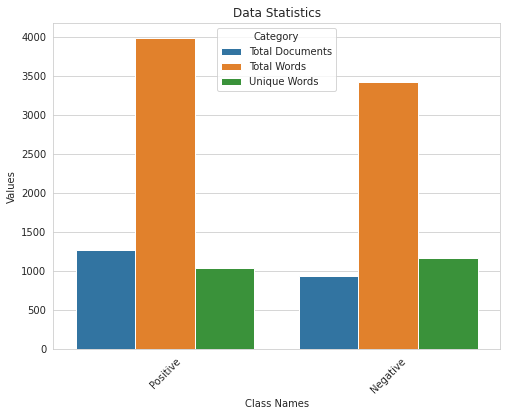

In [9]:
# plot the summary of  dataset
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

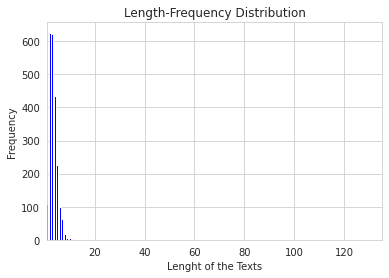

Maximum Length of a Text: 18
Minimum Length of a Text: 1
Average Length of a Text: 3.0


In [10]:
# Calculate the Text of each of the Text

dataset['TextLength'] = dataset.cleaned_text.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [11]:
#Label Encoding Function

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(target,bool):

    le = LabelEncoder()
    le.fit(target)
    encoded_labels = le.transform(target)
    labels = np.array(encoded_labels)
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(target[i],' ', encoded_labels[i],'\n')

    return labels


In [12]:
#Dataset Splitting Function

def dataset_split(feature_space,target):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,target,train_size = 0.8,
                                                  test_size = 0.2,random_state =42,stratify=target)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [13]:
# N-gram calculation using tf-idf (term frequency–inverse document frequency)
def calc_gram_tfidf(texts,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [14]:
#Unigram Tf-idf value calculation

def calc_unigram_tfidf(texts):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [15]:
#Bi-gram Tf-idf value calculation

def calc_bigram_tfidf(texts):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [16]:
#Tri-gram Tf-idf value calculation

def calc_trigram_tfidf(texts):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(texts)
    
    return tfidf,X

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
#Define classification models
def model_defination():
    
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    
    return ml_models,model_names

In [19]:
#Define performance measures
def model_performace(model,X_train,X_test,y_train,y_test):
    
    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [20]:
# Create dataframe for results
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [21]:
path = "/content/drive/MyDrive/consumer/Dataset_2/json/"

In [22]:
## save the performance of the model for each gram feature import json

import json
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned_text,gram)
    labels = label_encoding(dataset.Class,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}

    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 1872

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2207 
	Training		 1765 
	Test			 442


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 5680

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2207 
	Training		 1765 
	Test			 442


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 8528

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2207 
	Training		 1765 
	Test			 442


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [23]:
#Read the saved json file
accuracy1 = json.load(open('/content/drive/MyDrive/consumer/Dataset_2/json/ml_performance_Unigram.json'))
table1 = performance_table(accuracy1)
table1

,Accuracy,Precision,Recall,F1 Score
LR,88.24,88.24,88.24,88.24
DT,65.38,65.38,65.38,65.38
RF,86.20,86.20,86.20,86.20
MNB,88.01,88.01,88.01,88.01
KNN,79.19,79.19,79.19,79.19
Linear SVM,83.94,83.94,83.94,83.94
RBF SVM,87.33,87.33,87.33,87.33
SGD,89.37,89.37,89.37,89.37


In [24]:
print(f"Highest Accuracy achieved by {table1.Accuracy.idxmax(axis = 0)} at = {max(table1.Accuracy)}")
print(f"Highest F1-Score achieved by {table1['F1 Score'].idxmax(axis = 0)} at = {max(table1['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table1['Precision'].idxmax(axis = 0)} at = {max(table1['Precision'] )}")
print(f"Highest Recall Score achieved by {table1['Recall'].idxmax(axis = 0)} at = {max(table1['Recall'] )}")

Highest Accuracy achieved by SGD at = 89.37
Highest F1-Score achieved by SGD at = 89.37
Highest Precision Score achieved by SGD at = 89.37
Highest Recall Score achieved by SGD at = 89.37


In [25]:
#Read the saved json file
accuracy2 = json.load(open('/content/drive/MyDrive/consumer/Dataset_2/json/ml_performance_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,86.20,86.20,86.20,86.20
DT,65.38,65.38,65.38,65.38
RF,84.62,84.62,84.62,84.62
MNB,89.82,89.82,89.82,89.82
KNN,76.70,76.70,76.70,76.70
Linear SVM,79.64,79.64,79.64,79.64
RBF SVM,84.39,84.39,84.39,84.39
SGD,90.72,90.72,90.72,90.72


In [26]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table2['Recall'] )}")

Highest Accuracy achieved by SGD at = 90.72
Highest F1-Score achieved by SGD at = 90.72
Highest Precision Score achieved by SGD at = 90.72
Highest Recall Score achieved by SGD at = 90.72


In [27]:
#Read the saved json file
accuracy3 = json.load(open('/content/drive/MyDrive/consumer/Dataset_2/json/ml_performance_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,85.97,85.97,85.97,85.97
DT,65.38,65.38,65.38,65.38
RF,83.94,83.94,83.94,83.94
MNB,90.05,90.05,90.05,90.05
KNN,77.15,77.15,77.15,77.15
Linear SVM,75.34,75.34,75.34,75.34
RBF SVM,82.35,82.35,82.35,82.35
SGD,90.50,90.50,90.50,90.50


In [28]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by SGD at = 90.5
Highest F1-Score achieved by SGD at = 90.5
Highest Precision Score achieved by SGD at = 90.5
Highest Recall Score achieved by SGD at = 90.5


# Final Model

 - Selected feature: Bigram
 - Selected model: SGD

In [29]:
# calculate the Bi-gram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(dataset.cleaned_text)

lables = label_encoding(dataset.Class,False)

X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,target=lables)

Feature Size :======> 5680

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2207 
	Training		 1765 
	Test			 442


In [30]:
# Train SGD model and calculate the pred value
classifier1 = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [31]:
# calculate train and test accuracy 
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 99.66%
Test Accuracy is : 90.72%


In [32]:
# calculate classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       188
           1       0.90      0.94      0.92       254

    accuracy                           0.91       442
   macro avg       0.91      0.90      0.90       442
weighted avg       0.91      0.91      0.91       442



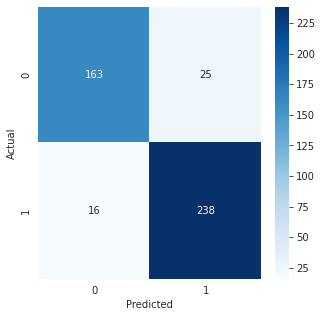

In [33]:
# plot confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
# compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9020


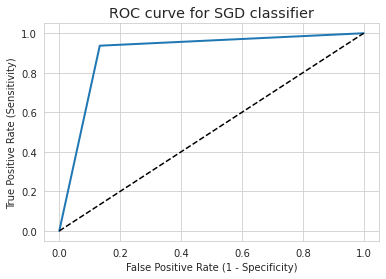

In [35]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SGD classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [36]:
# calculate cross-validated-score

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

Cross_validated_Score = cross_val_score(classifier1, X_train, y_train, cv=kfold).mean()

print('Cross validated Score : {:.4f}'.format(Cross_validated_Score))

Cross validated Score : 0.8918


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_grad